In [1]:
!pip install datasets
!pip install torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.6/536.6 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.9 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 10.0.1
    Uninstalling pyarrow-10.0.1:
      Successfully uninstalled pyarrow-10.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ibis-framework 7.1.0 requires pyarrow<15,>=2, but you have pyarrow 15.0.0 which is incompatible.


In [2]:
from datasets import load_dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from wordcloud import WordCloud,STOPWORDS
import sys
from sklearn.metrics import fbeta_score
from sklearn.neural_network import MLPClassifier
import re
from sklearn import preprocessing
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')
plt.style.use('seaborn')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
<ipython-input-2-129c9ca4d582>:29: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# Exploratory Data Analysis


In [4]:
dataset = load_dataset("symanto/autextification2023", 'detection_en')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/33845 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/21832 [00:00<?, ? examples/s]

In [5]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'prompt', 'text', 'label', 'domain', 'model'],
        num_rows: 33845
    })
    test: Dataset({
        features: ['id', 'prompt', 'text', 'label', 'domain', 'model'],
        num_rows: 21832
    })
})

In [6]:
dataset['train']

Dataset({
    features: ['id', 'prompt', 'text', 'label', 'domain', 'model'],
    num_rows: 33845
})

In [7]:
df  = dataset['train'].to_pandas()

In [8]:
df.head()

,id,prompt,text,label,domain,model
0,12322,you need to stop the,you need to stop the engine and wait until it ...,1,tweets,bloom-3b
1,1682,Article 11. On the basis of the information co...,The Commission shall publish the report; an in...,1,legal,bloom-7b1
2,22592,I have not been tweeting,"I have not been tweeting a lot lately, but I d...",1,tweets,babbage
3,17390,NO-PROMPT,I pass my exam and really thankgod for that bu...,0,tweets,NO-MODEL
4,30453,NO-PROMPT,The template will have 3 parts: a mustache sha...,0,wiki,NO-MODEL


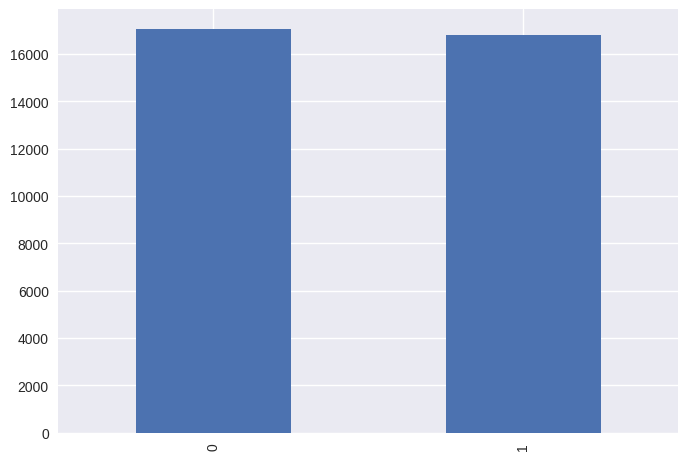

In [ ]:
df['label'].value_counts().plot(kind="bar")
plt.show()

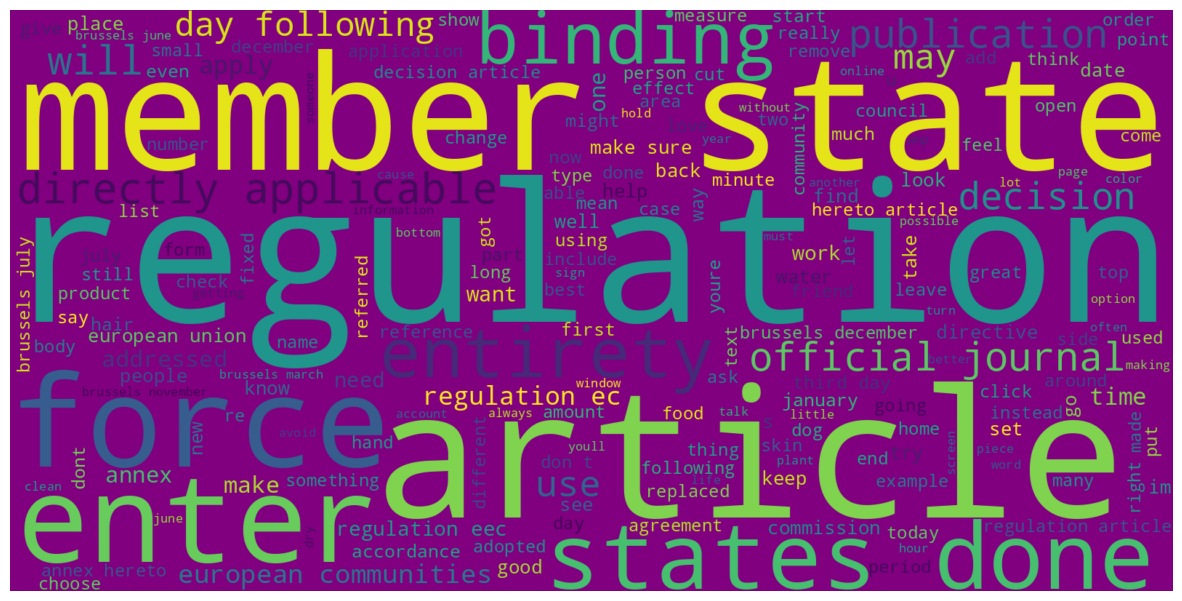

In [ ]:
word_string=" ".join(df[df['label'] == 0]['text'].str.lower())

plt.figure(figsize=(15,15))
wc = WordCloud(background_color="purple", stopwords = STOPWORDS, max_words=200, max_font_size= 300,  width=1600, height=800)
wc.generate(word_string)

plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), interpolation="bilinear")
plt.axis('off')
plt.show()

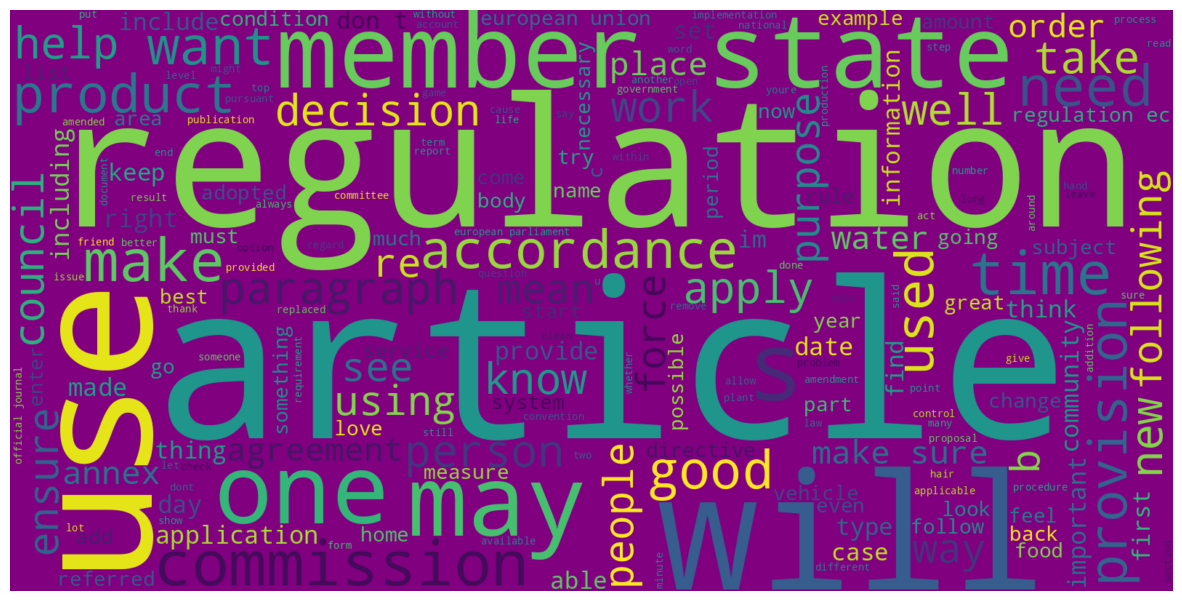

In [ ]:
word_string=" ".join(df[df['label'] == 1]['text'].str.lower())

plt.figure(figsize=(15,15))
wc = WordCloud(background_color="purple", stopwords = STOPWORDS, max_words=200, max_font_size= 300,  width=1600, height=800)
wc.generate(word_string)

plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), interpolation="bilinear")
plt.axis('off')
plt.show()

#  Traditional machine learning approach

In [9]:
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [10]:
df["text"] = df["text"].str.lower()
df.head()

,id,prompt,text,label,domain,model
0,12322,you need to stop the,you need to stop the engine and wait until it ...,1,tweets,bloom-3b
1,1682,Article 11. On the basis of the information co...,the commission shall publish the report; an in...,1,legal,bloom-7b1
2,22592,I have not been tweeting,"i have not been tweeting a lot lately, but i d...",1,tweets,babbage
3,17390,NO-PROMPT,i pass my exam and really thankgod for that bu...,0,tweets,NO-MODEL
4,30453,NO-PROMPT,the template will have 3 parts: a mustache sha...,0,wiki,NO-MODEL


In [ ]:
# remove occurences of "https:" in text using re
df['text'] = df['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [ ]:
# lemmatize text field with pos
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

df["text_pos_lemmatized"] = df["text"].apply(lambda text: lemmatize_words(text))

In [ ]:
# Split the data set into train and test 80/20
X_train, X_test, y_train, y_test = train_test_split(
     df['text_pos_lemmatized'], df['label'], test_size=0.20, random_state=42)

In [ ]:
vectorizer = TfidfVectorizer()
X_train_tf = vectorizer.fit_transform(X_train)

In [ ]:
data = [[],[],[],[]]
# evaluate performance of various models
models = [RandomForestClassifier(n_estimators = 100, max_depth=5, random_state=42),
          LinearSVC(random_state=42),
          MultinomialNB(),
          LogisticRegression(random_state=42)]

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

scoring = ['accuracy', 'f1_macro', 'recall_macro', 'precision_macro', 'roc_auc']

# store results in list
for i in range(len(models)):
    model_name = models[i].__class__.__name__
    result = cross_validate(models[i], X_train_tf, y_train, cv=kf, scoring=scoring)
    data[i].append(result['test_accuracy'].mean())
    data[i].append(result['test_f1_macro'].mean())
    data[i].append(result['test_recall_macro'].mean())
    data[i].append(result['test_precision_macro'].mean())
    data[i].append(result['test_roc_auc'].mean())

In [ ]:
df_train = pd.DataFrame(data)
columns = ["test_accuracy", "test_f1_macro", "test_recall_macro", "test_precision_macro", "test_roc_auc"]
df_train.index = ["RandomForest", "LinearSVC", "MultinomialNB", "LogisticRegression"]
df_train.columns = columns
df_train

,test_accuracy,test_f1_macro,test_recall_macro,test_precision_macro,test_roc_auc
RandomForest,0.635471,0.600278,0.635405,0.708356,0.761397
LinearSVC,0.758938,0.758894,0.758935,0.759121,0.846807
MultinomialNB,0.685441,0.677709,0.685406,0.705095,0.785459
LogisticRegression,0.765069,0.765064,0.765068,0.765089,0.857360


#  Beginnning of Transformer models

#Trying pretrained model

In [11]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel
import torch.nn.functional as F
from transformers import AutoModelForSequenceClassification
from transformers import AutoTokenizer
from datasets import load_dataset, DatasetDict, Dataset
from torch.utils.data import DataLoader
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [12]:
tokenizer = AutoTokenizer.from_pretrained("dima806/ai-generated-essay-detection-distilbert", truncation=True, max_length=512)
model = AutoModelForSequenceClassification.from_pretrained("dima806/ai-generated-essay-detection-distilbert")

config.json:   0%|          | 0.00/731 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/263M [00:00<?, ?B/s]

In [13]:
test_df = dataset['test'].to_pandas()
data = test_df[['text','label']]
test_dataset = Dataset.from_dict(data)
test_dataset

Dataset({
    features: ['text', 'label'],
    num_rows: 21832
})

In [14]:
tokenized_dataset = test_dataset.map(lambda example: tokenizer(example['text'], padding=True, truncation=True),
    batched=True,
    batch_size=16
)

tokenized_dataset = tokenized_dataset.remove_columns(["text"])
tokenized_dataset = tokenized_dataset.rename_column("label", "labels")
tokenized_dataset.set_format("torch")

Map:   0%|          | 0/21832 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [15]:
test_dataloader = DataLoader(tokenized_dataset, batch_size=16)

In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup
from tqdm.notebook import tqdm
predictions = []
ys = []
loss = 0
model.cuda()
model.eval()
with torch.no_grad():
  for batch in test_dataloader:
    inputs = batch['input_ids'].to(device)
    mask = batch['attention_mask'].to(device)
    labels = batch['labels'].to(device)
    output = model(inputs, attention_mask=mask)
    loss += torch.nn.functional.cross_entropy(output.logits, labels)
    ys.extend(labels.tolist())
    for thing in output.logits:
        predictions.append(torch.argmax(thing))

avg_val_loss = loss / len(tokenized_dataset)
print(f"Avg loss: {avg_val_loss}")

Avg loss: 0.1109018325805664


In [ ]:
p = [x.item() for x in predictions]
score = roc_auc_score(p,ys)
score

0.40720052841595156

#Fine-tuning

In [15]:
train_df = dataset['train'].to_pandas()
data = train_df[['text','label']]
train_dataset = Dataset.from_dict(data)
train_dataset

Dataset({
    features: ['text', 'label'],
    num_rows: 33845
})

In [16]:
t = int(len(train_dataset) * .8)

split_dataset = DatasetDict(
    train=train_dataset.shuffle(seed=1111).select(range(t)),
    val=train_dataset.shuffle(seed=1111).select(range(t, len(train_dataset))),
)

In [17]:
tokenized_dataset = split_dataset.map(lambda example: tokenizer(example['text'], padding=True, truncation=True),
    batched=True,
    batch_size=16
)

tokenized_dataset = tokenized_dataset.remove_columns(["text"])
tokenized_dataset = tokenized_dataset.rename_column("label", "labels")
tokenized_dataset.set_format("torch")

Map:   0%|          | 0/27076 [00:00<?, ? examples/s]

Map:   0%|          | 0/6769 [00:00<?, ? examples/s]

In [18]:
train_dataloader = DataLoader(tokenized_dataset['train'], batch_size=16)
eval_dataloader = DataLoader(tokenized_dataset['val'], batch_size=16)

In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup
from tqdm.notebook import tqdm

model = AutoModelForSequenceClassification.from_pretrained("dima806/ai-generated-essay-detection-distilbert", num_labels=2)
model.cuda()
num_epochs = 3
num_training_steps = 3 * len(train_dataloader)
optimizer = AdamW(model.parameters(), lr=5e-5, weight_decay=0.01)
lr_scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)

best_val_loss = float("inf")
progress_bar = tqdm(range(num_training_steps))
loss = 0

for epoch in range(num_epochs):
    # training
    model.train()
    for batch_i, batch in enumerate(train_dataloader):

        batch['input_ids'] = batch['input_ids'].to(device)
        batch['attention_mask'] = batch['attention_mask'].to(device)
        batch['labels'] = batch['labels'].to(device)

        output = model(**batch)
        optimizer.zero_grad()
        loss = torch.nn.functional.cross_entropy(output.logits, batch['labels'])
        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        progress_bar.update(1)

    # validation
    model.eval()
    for batch_i, batch in enumerate(eval_dataloader):
        batch['input_ids'] = batch['input_ids'].to(device)
        batch['attention_mask'] = batch['attention_mask'].to(device)
        batch['labels'] = batch['labels'].to(device)
        with torch.no_grad():
            output = model(**batch)
        loss += output.loss

    avg_val_loss = loss / len(eval_dataloader)
    print(f"Validation loss: {avg_val_loss}")
    if avg_val_loss < best_val_loss:
        print("Saving checkpoint!")
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), f"epoch_{epoch}.pt")
        print(f"epoch_{epoch}.pt")

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


  0%|          | 0/5079 [00:00<?, ?it/s]

Validation loss: 0.22533543407917023
Saving checkpoint!
epoch_0.pt
Validation loss: 0.2954707145690918
Validation loss: 0.36261898279190063


# Evaluate fine-tuned model on test set

In [ ]:
model.load_state_dict(torch.load("epoch_0.pt"))

<All keys matched successfully>

In [ ]:
loss = 0
predictions = []
ys = []
model.eval()
with torch.no_grad():
  for batch in test_dataloader:
    inputs = batch['input_ids'].to(device)
    mask = batch['attention_mask'].to(device)
    labels = batch['labels'].to(device)
    output = model(inputs, attention_mask=mask)
    loss += torch.nn.functional.cross_entropy(output.logits, labels)
    ys.extend(labels.tolist())
    for thing in output.logits:
        predictions.append(torch.argmax(thing))
avg_val_loss = loss / len(test_dataset)
print(f"Avg loss: {avg_val_loss}")

Avg loss: 0.06707119941711426


# The loss went down



In [ ]:
p = [x.item() for x in predictions]
score = roc_auc_score(p,ys)
score

0.78054880231278

# But the auroc could be better

In [16]:
from transformers import pipeline
from transformers import DataCollatorForLanguageModeling
import re
import random


classifier = pipeline("fill-mask", top_k=7, device=0)

def mask_conversion(string):
    string = re.sub(r'\[MASK\]', '<mask>', string)
    return string

def replace_mask(string):
    replace_list = []
    has_mask = 0
    fill_mask = list()
    # Checking if string contains <mask> token. Classifier throws an error if called on a string  w/o one
    for k in range(len(string.split())):
        if string.split()[k] == '<mask>':
          has_mask = 1
          fill_mask = classifier(string)
    # Go through fill_mask and make list of random lower probability replacement tokens
    for i in range(len(fill_mask)):
        r = random.randint(3,6)
        if has_mask and type(fill_mask[0]) != dict:
          replace_list.append(fill_mask[i][r]['token_str'])
        if has_mask and type(fill_mask[0]) == dict:
          replace_list.append(fill_mask[i]['token_str'])
    # Replace masked tokens with tokens from replace_list
    for j in range(len(string.split())):
        if j < len(string.split()):
            if has_mask and string.split()[j] == '<mask>':
                if replace_list[0] != ' ':
                    replace = replace_list.pop(0)
                    string = string.replace('<mask>', replace, 1)
    string = ' '.join(string.split())
    return string

def strip_characters(string):
    sep = '[SEP]'
    string = string.split(sep, 1)[0]
    string = re.sub(r'\[CLS\]|\<mask>', '', string)
    string = "".join(string.rstrip())
    return string

No model was supplied, defaulted to distilroberta-base and revision ec58a5b (https://huggingface.co/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [17]:
data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm_probability=0.25)

In [50]:
hum = []
llm = []
for i in range(len(train_dataset)):
    l = train_dataset[i]['label']
    t = train_dataset[i]['text']
    if l == 0:
        hum.append(t)
    if l == 1:
        llm.append(t)

In [51]:
df = pd.DataFrame(llm)
df.columns = ['text']
llm_dataset = Dataset.from_dict(df)
llm_dataset

Dataset({
    features: ['text'],
    num_rows: 16799
})

In [52]:
df = pd.DataFrame(hum)
df.columns = ['text']
hum_dataset = Dataset.from_dict(df)
hum_dataset

Dataset({
    features: ['text'],
    num_rows: 17046
})

In [53]:
llm_tokenized_dataset = llm_dataset.map(lambda example: tokenizer(example['text']))
llm_tokenized_dataset.set_format("torch")

Map:   0%|          | 0/16799 [00:00<?, ? examples/s]

In [54]:
llm_tokenized_dataset

Dataset({
    features: ['text', 'input_ids', 'attention_mask'],
    num_rows: 16799
})

In [55]:
hum_tokenized_dataset = hum_dataset.map(lambda example: tokenizer(example['text']))
hum_tokenized_dataset.set_format("torch")

Map:   0%|          | 0/17046 [00:00<?, ? examples/s]

In [56]:
hum_tokenized_dataset

Dataset({
    features: ['text', 'input_ids', 'attention_mask'],
    num_rows: 17046
})

In [57]:
masked_llm = data_collator(llm_tokenized_dataset['input_ids'])
masked_hum = data_collator(hum_tokenized_dataset['input_ids'])

In [58]:
masked_llm_list = []
[masked_llm_list.append(tokenizer.decode(masked_llm['input_ids'][i])) for i in range(len(masked_llm['input_ids']))];

In [59]:
masked_hum_list = []
[masked_hum_list.append(tokenizer.decode(masked_hum['input_ids'][i])) for i in range(len(masked_hum['input_ids']))];

### Convert [MASK] to \<mask>

In [60]:
for i in range(len(masked_llm_list)):
    masked_llm_list[i] = mask_conversion(masked_llm_list[i])
for i in range(len(masked_hum_list)):
    masked_hum_list[i] = mask_conversion(masked_hum_list[i])

In [80]:
dataset['train'][1]['text']

'The Commission shall publish the report; an interim report at least once every two years, and whenever it considers that such a report is necessary or appropriate. 2. The Commission may request any relevant information from the Member States, the Council, the European Parliament, international organizations, bodies or specialized agencies. 3. The Commission shall ensure adequate access by the competent national authorities for the purpose of implementing this Regulation. 4. The Commission shall give special attention to the social dimension of the programme. 5. The'

In [81]:
masked_llm_list[1]

'[CLS] the commission shall publish the report ; an interim report at least once <mask> two <mask> <mask> and <mask> it considers that such a report <mask> necessary or appropriate. 2 murder the <mask> may request any relevant <mask> from the affect states <mask> <mask> council, <mask> european parliament <mask> international organizations, bodies or specialized agencies. 3. the <mask> shall ensure adequate access <mask> the <mask> <mask> authorities for the purpose of implementing this regulation. <mask>. the <mask> <mask> give special <mask> to the social dimension of the programme. 5. <mask> [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]'

In [82]:
strip_characters(replace_mask(masked_llm_list[1][:512]))

' the commission shall publish the report ; an interim report at least once under two consecutive parties and unless it considers that such a report deems necessary or appropriate. 2 murder the committee may request any relevant advice from the affect states of national council, any european parliament nor international organizations, bodies or specialized agencies. 3. the commissioners shall ensure adequate access from the respective administrative authorities for the purpose of implementing this regulation. . t'

### Replace masked tokens

In [71]:
import pickle
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
perturbed_llm = []
for i in range(100):
    perturbed_llm.append(strip_characters(replace_mask(masked_llm_list[i][:512])))

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


In [87]:
with open('perturbed_llm.pkl', 'wb') as f:
    pickle.dump(perturbed_llm, f)

In [88]:
perturbed_hum = []
for i in range(100):
    perturbed_hum.append(strip_characters(replace_mask(masked_hum_list[i][:512])))

In [89]:
with open('perturbed_hum.pkl', 'wb') as f:
    pickle.dump(perturbed_hum, f)

In [93]:
DATA_PATH = "/content"
infile = open(DATA_PATH+'/perturbed_llm.pkl','rb')
perturbed_llm_ = pickle.load(infile)
infile = open(DATA_PATH+'/perturbed_hum.pkl','rb')
perturbed_hum_ = pickle.load(infile)

# Example of the contrast between the original text and perturbed version

In [26]:
dataset['train'][0]['text']

'you need to stop the engine and wait until it stops. This is how I would do it: // Check if its safe'

In [94]:
perturbed_llm_[0]

' you need never stop the engine or wait until it settling. this is how i would do it : / / check if its safe'

# Probabilities of sequence generated by llm after perturbations

In [33]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel
import torch.nn.functional as F

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')
model.cuda()

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [133]:
likelihood_llm = []
for i in range(len(perturbed_llm_)):

    text = perturbed_llm[i]

    input_ids = tokenizer.encode(text, return_tensors='pt')

    with torch.no_grad():
        inputs = input_ids[0].to(device)
        outputs = model(inputs)
        logits = outputs.logits

    probabilities = F.softmax(logits, dim=-1)

    sum_prob = 0

    for i, token_id in enumerate(input_ids[0]):
        token_prob = probabilities[i, token_id].item()
        sum_prob += token_prob
    avg_prob = sum_prob/len(input_ids[0])
    likelihood_llm.append(avg_prob)

# Probabilities of sequence generated by human after perturbations

In [97]:
likelihood_hum = []
for i in range(len(perturbed_hum_)):

    text = perturbed_hum_[i]

    input_ids = tokenizer.encode(text, return_tensors='pt')

    with torch.no_grad():
        inputs = input_ids[0].to(device)
        outputs = model(inputs)
        logits = outputs.logits

    probabilities = F.softmax(logits, dim=-1)

    sum_prob = 0

    for i, token_id in enumerate(input_ids[0]):
        token_prob = probabilities[i, token_id].item()
        sum_prob += token_prob
    avg_prob = sum_prob/len(input_ids[0])
    likelihood_hum.append(avg_prob)

# Probabilities of original sequence generated by llm

In [137]:
original_llm = llm_tokenized_dataset['text']

In [138]:
likelihood_llm_original = []
for i in range(100):

    text = original_llm[i]

    input_ids = tokenizer.encode(text, return_tensors='pt')[:512]

    with torch.no_grad():
        inputs = input_ids[0].to(device)
        outputs = model(inputs)
        logits = outputs.logits

    probabilities = F.softmax(logits, dim=-1)

    sum_prob = 0

    for i, token_id in enumerate(input_ids[0]):
        token_prob = probabilities[i, token_id].item()
        sum_prob += token_prob
    avg_prob = sum_prob/len(input_ids[0])
    likelihood_llm_original.append(avg_prob)



# Probabilities of original sequence generated by human

In [100]:
original_hum = hum_tokenized_dataset['text']

In [110]:
likelihood_hum_original = []
for i in range(100):

    text = original_hum[i]

    input_ids = tokenizer.encode(text, return_tensors='pt')[:512]

    with torch.no_grad():
        inputs = input_ids[0].to(device)
        outputs = model(inputs)
        logits = outputs.logits

    probabilities = F.softmax(logits, dim=-1)

    sum_prob = 0

    for i, token_id in enumerate(input_ids[0]):
        token_prob = probabilities[i, token_id].item()
        sum_prob += token_prob
    avg_prob = sum_prob/len(input_ids[0])
    likelihood_hum_original.append(avg_prob)

In [175]:
df = pd.DataFrame({'llm_prob_original': likelihood_llm_original,
                   'llm_prob_after_perturbation': likelihood_llm,
                   'hum_prob_original': likelihood_hum_original,
                   'hum_prob_after_perturbation': likelihood_hum})


# Normalize values

In [177]:
df['llm_distance'] = (df['llm_prob_original'] - df['llm_prob_after_perturbation'].mean())/df['llm_prob_after_perturbation'].std()
df['hum_distance'] = (df['hum_prob_original'] - df['hum_prob_after_perturbation'].mean())/ df['hum_prob_after_perturbation'].std()

In [178]:
df.head()

,llm_prob_original,llm_prob_after_perturbation,hum_prob_original,hum_prob_after_perturbation,llm_distance,hum_distance
0,0.000386,0.002966,0.000885,0.000731,-0.693794,-0.322449
1,0.000415,0.003630,0.000719,0.001512,-0.681932,-0.342572
2,0.000400,0.002265,0.000291,0.001936,-0.688154,-0.394348
3,0.001135,0.002423,0.000156,0.001408,-0.389346,-0.410737
4,0.000396,0.001513,0.000365,0.001454,-0.689767,-0.385448


In [179]:
df['hum_distance'].mean()

-0.2794742055544366

In [180]:
df['llm_distance'].mean()

-0.6437674503151953

# The text generated by a machine was more effected by perturbation than was the human generated text.

In [18]:
evaluation = test_dataset[:1000]

In [21]:
test_dataset

Dataset({
    features: ['text', 'label'],
    num_rows: 21832
})

In [24]:
zero_tokenized_dataset = test_dataset.map(lambda example: tokenizer(example['text']))

zero_tokenized_dataset = zero_tokenized_dataset.remove_columns(["text"])
zero_tokenized_dataset = zero_tokenized_dataset.rename_column("label", "labels")
zero_tokenized_dataset.set_format("torch")

Map:   0%|          | 0/21832 [00:00<?, ? examples/s]

In [25]:
zero_tokenized_dataset

Dataset({
    features: ['labels', 'input_ids', 'attention_mask'],
    num_rows: 21832
})

In [26]:
masked_zero = data_collator(zero_tokenized_dataset['input_ids'])

In [27]:
masked_zero_list = []
[masked_zero_list.append(tokenizer.decode(masked_zero['input_ids'][i])) for i in range(len(masked_zero['input_ids']))];

In [28]:
for i in range(len(masked_zero_list)):
    masked_zero_list[i] = mask_conversion(masked_zero_list[i])

In [32]:
perturbed_zero = []
for i in range(100):
    perturbed_zero.append(strip_characters(replace_mask(masked_zero_list[i][:512])))

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


In [36]:
likelihood_zero = []
for i in range(len(perturbed_zero)):

    text = perturbed_zero[i]

    input_ids = tokenizer.encode(text, return_tensors='pt')

    with torch.no_grad():
        inputs = input_ids[0].to(device)
        outputs = model(inputs)
        logits = outputs.logits

    probabilities = F.softmax(logits, dim=-1)

    sum_prob = 0

    for i, token_id in enumerate(input_ids[0]):
        token_prob = probabilities[i, token_id].item()
        sum_prob += token_prob
    avg_prob = sum_prob/len(input_ids[0])
    likelihood_zero.append(avg_prob)

In [38]:
original = test_dataset['text']

In [39]:
likelihood_original = []
for i in range(100):

    text = original[i]

    input_ids = tokenizer.encode(text, return_tensors='pt')

    with torch.no_grad():
        inputs = input_ids[0].to(device)
        outputs = model(inputs)
        logits = outputs.logits

    probabilities = F.softmax(logits, dim=-1)

    sum_prob = 0

    for i, token_id in enumerate(input_ids[0]):
        token_prob = probabilities[i, token_id].item()
        sum_prob += token_prob
    avg_prob = sum_prob/len(input_ids[0])
    likelihood_original.append(avg_prob)

In [40]:
df = pd.DataFrame({'prob_original': likelihood_original,
                   'after_perturbation': likelihood_zero})

In [42]:
df['distance'] = (df['prob_original'] - df['after_perturbation'].mean())/df['after_perturbation'].std()


In [43]:
df.head()

,prob_original,after_perturbation,distance
0,0.000561,0.000580,-0.497202
1,0.000559,0.003895,-0.497829
2,0.000126,0.000618,-0.628727
3,0.000819,0.001206,-0.419473
4,0.000385,0.000710,-0.550370


In [101]:
epsilon = -0.50
df['prediction'] = df['distance'] < epsilon

In [102]:
df.head()

,prob_original,after_perturbation,distance,prediction
0,0.000561,0.000580,-0.497202,False
1,0.000559,0.003895,-0.497829,False
2,0.000126,0.000618,-0.628727,True
3,0.000819,0.001206,-0.419473,False
4,0.000385,0.000710,-0.550370,True


In [103]:
labels = [zero_tokenized_dataset['labels'][:100]]

In [104]:
labels[0]

tensor([0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
        1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 0, 1, 1])

In [105]:
l = [x.item() for x in labels[0]]
p = df['prediction'].tolist()

score = roc_auc_score(l, p)
score

0.5475040257648953

# This method is not good at all, only slightly better than chance.